In [2]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from nltk.tokenize import TweetTokenizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
tweet_full = pd.read_csv(r'./tweetsText.csv')

In [7]:
tweet_text = tweet_full.text

In [13]:
# TweetTokenizer?

In [17]:
tweet_tokenizer = TweetTokenizer(strip_handles=True,preserve_case=False,reduce_len=True)

In [21]:
tweets_tokens = tweet_text.iloc[0:10000].apply(tweet_tokenizer.tokenize)

C:\Users\fbbigger\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


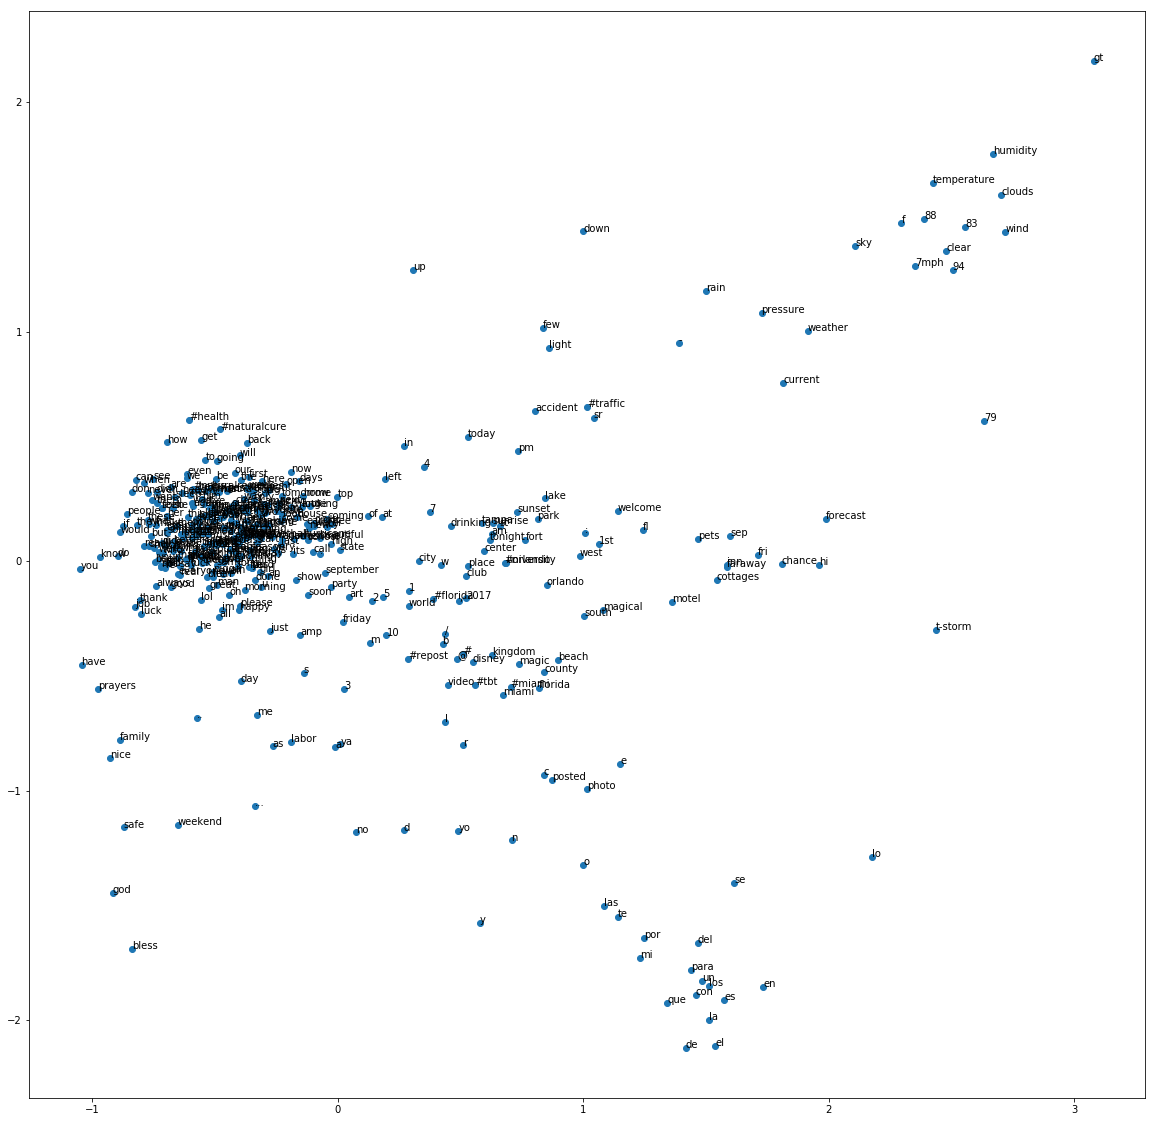

In [24]:
model = Word2Vec(tweets_tokens, min_count=35, sg=1)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.figure(figsize=(20,20))
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()